## Familiarization

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Not allowed to use seaborn
import seaborn as sns

df = pd.read_csv("lab1_train.csv")
print(df.shape)

(496800, 53)


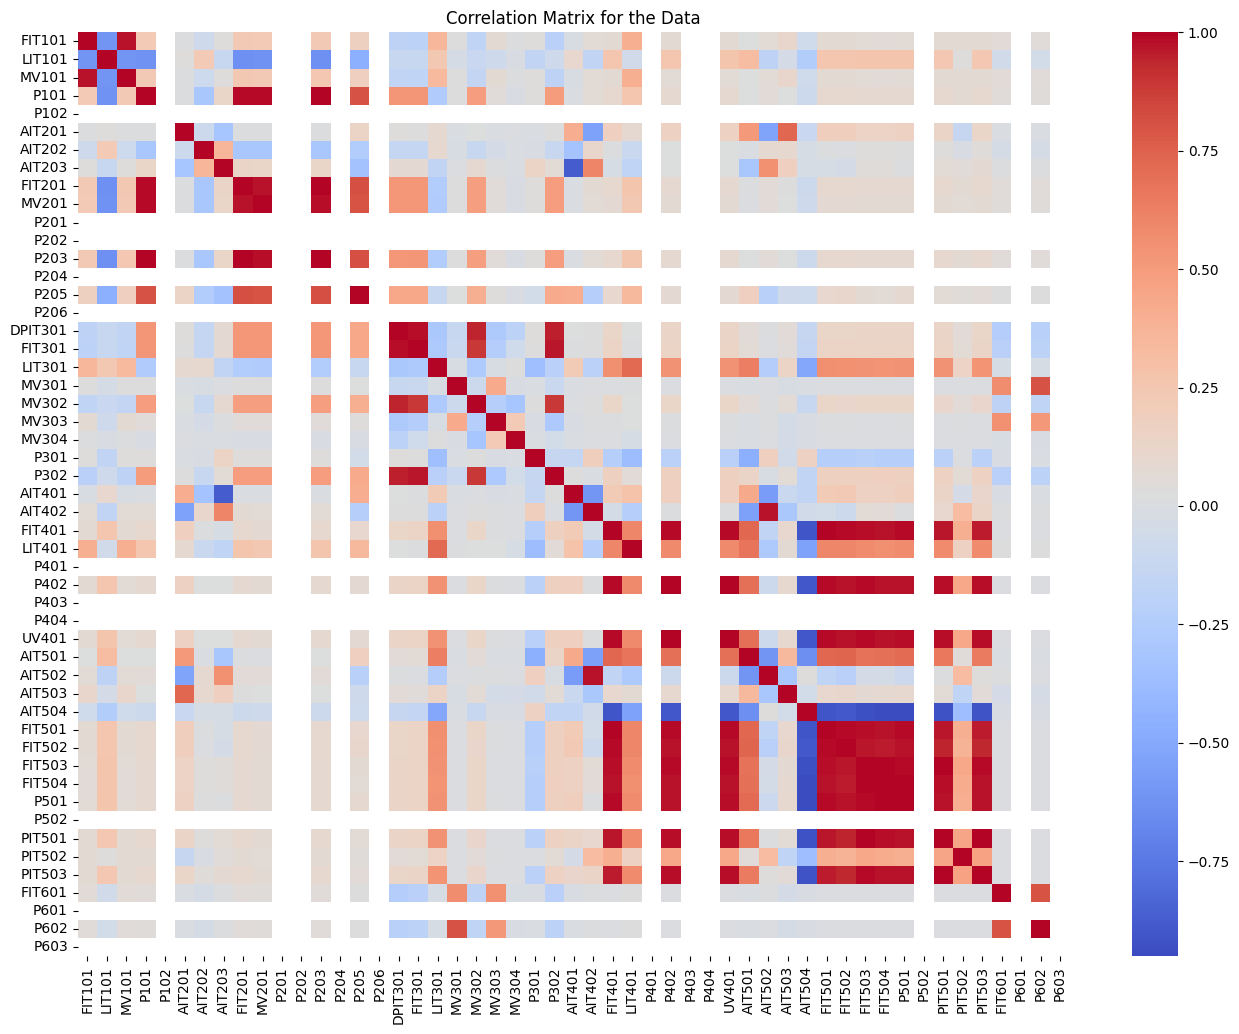

In [53]:
# print(df.head)
df_numeric = df.drop(columns=["Timestamp", "Normal/Attack"])
corr_m= df_numeric.corr()
plt.figure(figsize=(16, 12))

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn-heatmap
sns.heatmap(corr_m, annot=False, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for the Data")
plt.show()

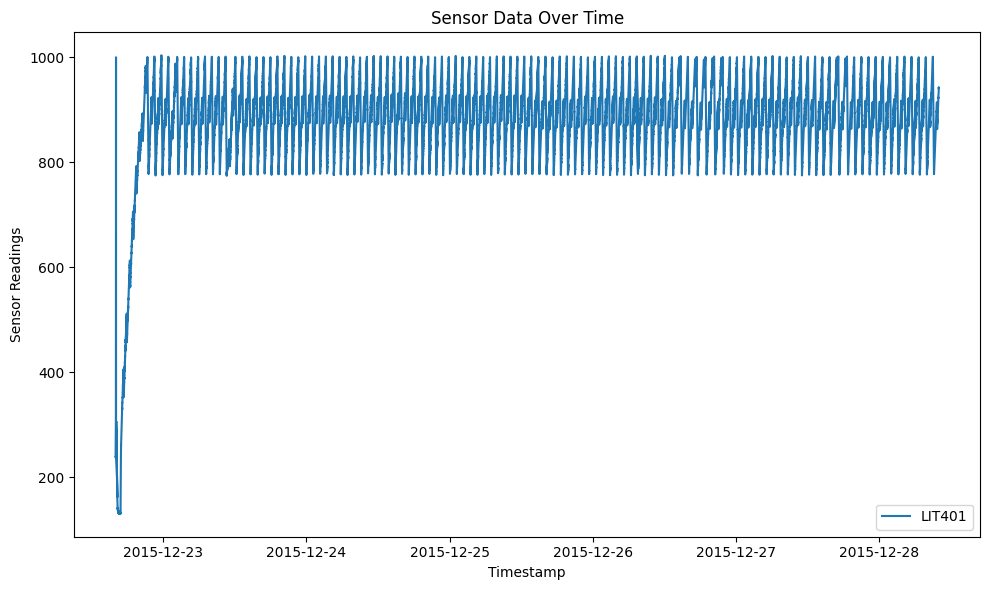

In [49]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

plt.figure(figsize=(10, 6))
lst = {'LIT401'}
# Use LIT401
# DPIT301, LIT101, LIT301
for x in lst:
    plt.plot(df['Timestamp'], df[x], label=x)

plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.title('Sensor Data Over Time')
plt.legend()

plt.tight_layout()
plt.show()

## DTW Anomaly Detection

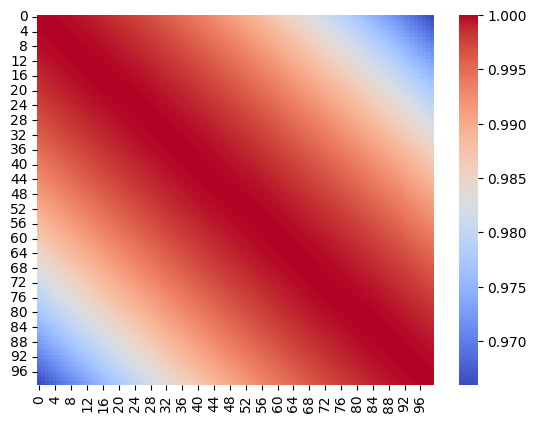

In [54]:
def signal_heatmap(signal= "LIT401", window_shape = 1000, start_index = 1000, end_index = -1):
    # Now we select a column (e.g., LIT101), generate sliding windows of size 20, and compute the correlation matrix between the windows.
    sig = df[signal].tolist()
    windows_data = []

    if (end_index == -1): 
        end_index = len(sig)

    windows_data = np.lib.stride_tricks.sliding_window_view(sig[start_index:end_index], window_shape=window_shape)

    windows_df = pd.DataFrame(windows_data)
    windows_correlation_df = windows_df.corr(method="spearman")
    sns.heatmap(windows_correlation_df, annot=False, cmap='coolwarm')
    plt.show()
    
signal_heatmap(signal="LIT401", window_shape=100, start_index=1000)